In [1]:
from cymetric import convenient_interface as com
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.enrichment is not yet QA compliant.
  return f(*args, **kwds)


In [2]:
import cymetric as cym
db = cym.dbopen('cyclus.sqlite')
eval= cym.Evaluator(db, False)

In [3]:
E1_pu_src = com.get_transaction_timeseries(eval, send_list=['E1_alt_src'], rec_list=['FBR_fabrication'], nuc_list=['pu238','pu239','pu240','pu241','pu242'])
E1_pu = com.get_transaction_timeseries(eval, send_list=['Storage_E1'], rec_list=['FBR_fabrication'], nuc_list=['pu238','pu239','pu240','pu241','pu242'])

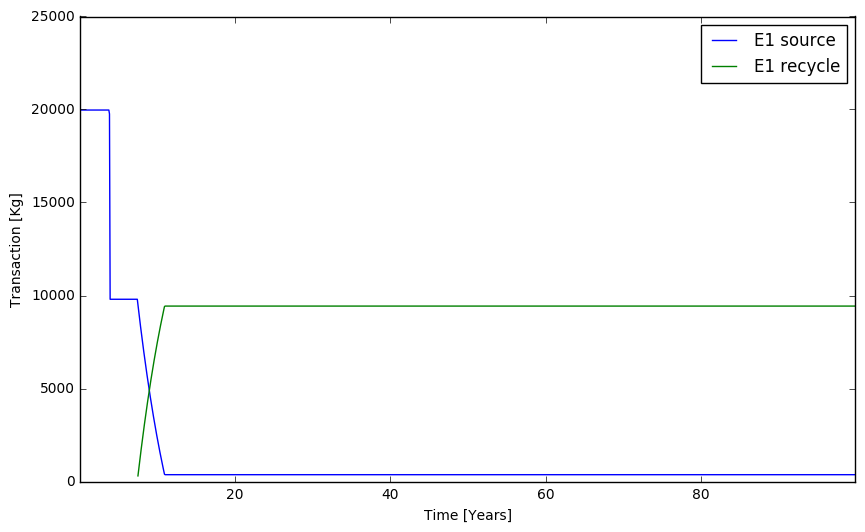

In [4]:
E1_pu_src_ = pd.DataFrame({'Time': E1_pu_src.Time/12., 'E1 source': E1_pu_src.Mass})
E1_pu_src_ = E1_pu_src_.groupby('Time').sum()
E1_pu_ = pd.DataFrame({'Time': E1_pu.Time/12., 'E1 recycle': E1_pu.Mass})
E1_pu_ = E1_pu_.groupby('Time').sum()

e1x = E1_pu_src_.plot(kind='line', figsize=(10, 6))
E1_pu_.plot(ax=e1x)
plt.xlabel('Time [Years]')
plt.ylabel('Transaction [Kg]')

In [5]:
E1_pu_str = com.get_inventory_timeseries(eval, ['Storage_E1'], ['pu238','pu239','pu240','pu241','pu242'])

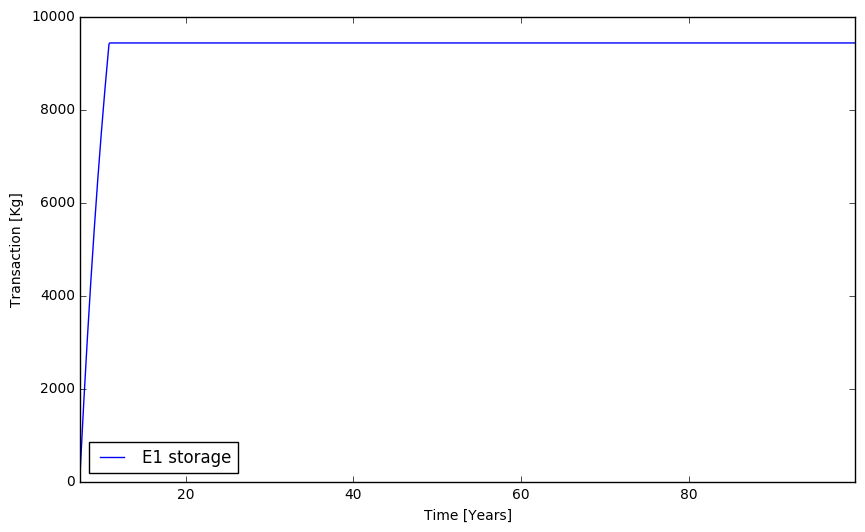

In [11]:
E1_pu_str_ = pd.DataFrame({'Time': E1_pu_str.Time/12., 'E1 storage': E1_pu_str.Quantity})
E1_pu_str_ = E1_pu_str_.groupby('Time').sum()

e1x = E1_pu_str_.plot( figsize=(10, 6))
plt.xlabel('Time [Years]')
plt.ylabel('Transaction [Kg]')

In [7]:
J1_pu_src = com.get_transaction_timeseries(eval, send_list=['J1_TRU_alt_src'], rec_list=['FBR_fabrication'], nuc_list=['pu238','pu239','pu240','pu241','pu242'])
J1_pu = com.get_transaction_timeseries(eval, send_list=['Storage_J1_TRU'], rec_list=['FBR_fabrication'], nuc_list=['pu238','pu239','pu240','pu241','pu242'])

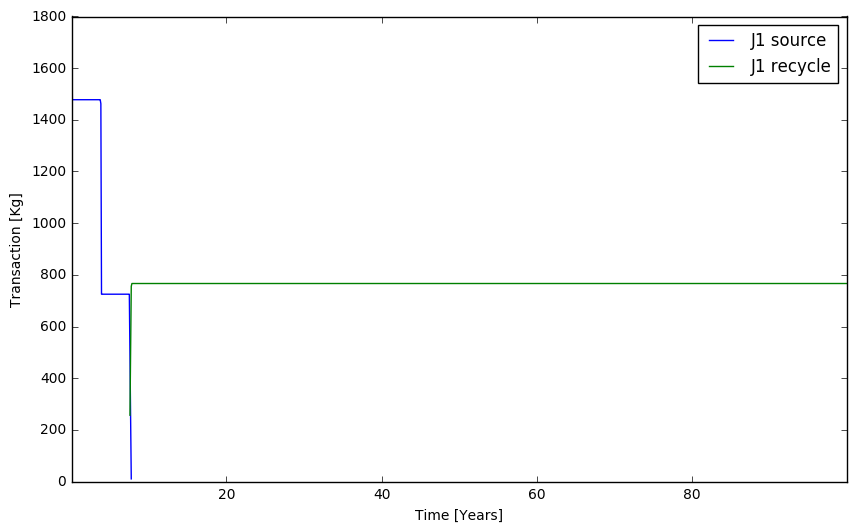

In [8]:
J1_pu_src_ = pd.DataFrame({'Time': J1_pu_src.Time/12., 'J1 source': J1_pu_src.Mass})
J1_pu_src_ = J1_pu_src_.groupby('Time').sum()
J1_pu_ = pd.DataFrame({'Time': J1_pu.Time/12., 'J1 recycle': J1_pu.Mass})
J1_pu_ = J1_pu_.groupby('Time').sum()

j1x = J1_pu_src_.plot(kind='line', figsize=(10, 6))
J1_pu_.plot(ax=j1x)
plt.xlabel('Time [Years]')
plt.ylabel('Transaction [Kg]')

In [9]:
E2_pu_src = com.get_transaction_timeseries(eval, send_list=['E2_alt_src'], rec_list=['PWR_fabrication'], nuc_list=['pu238','pu239','pu240','pu241','pu242'])
E2_pu = com.get_transaction_timeseries(eval, send_list=['Storage_E2'], rec_list=['PWR_fabrication'], nuc_list=['pu238','pu239','pu240','pu241','pu242'])

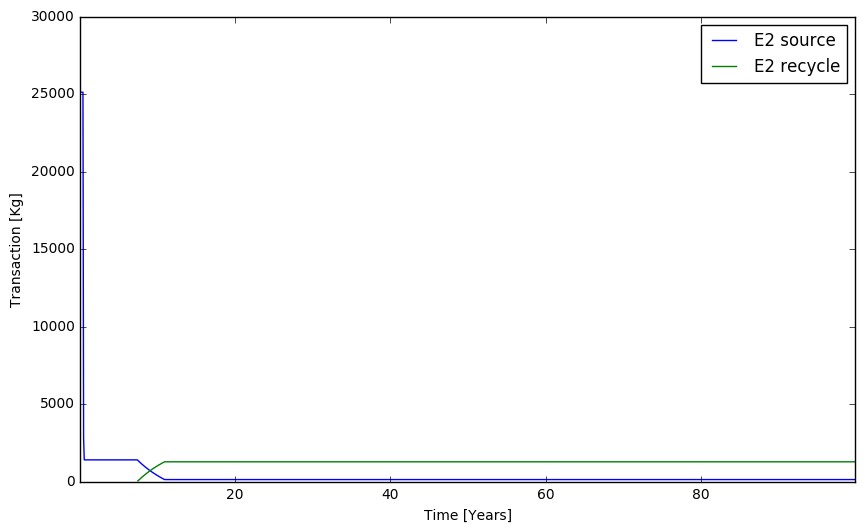

In [10]:
E2_pu_src_ = pd.DataFrame({'Time': E2_pu_src.Time/12., 'E2 source': E2_pu_src.Mass})
E2_pu_src_ = E2_pu_src_.groupby('Time').sum()
E2_pu_ = pd.DataFrame({'Time': E2_pu.Time/12., 'E2 recycle': E2_pu.Mass})
E2_pu_ = E2_pu_.groupby('Time').sum()


e2x = E2_pu_src_.plot(kind='line', figsize=(10, 6))
E2_pu_.plot(ax=e2x)
plt.xlabel('Time [Years]')
plt.ylabel('Transaction [Kg]')